In [37]:
# importing packages i will use for this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data

df = pd.read_csv(r'/Users/user/Desktop/movies_data.csv') 

In [38]:
df.head() # looking at data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [39]:
# checking for missing values in table

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [40]:
# data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [42]:
#creating correct year column - release date & year should be the same

df['correctyear'] = df['released'].astype(str).str[:4]

df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,correctyear
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,PG,Drama,2020,2020-10-23,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,150000000,NaN,90.0,2020,2020
7664,Dream Round,PG,Comedy,2020,2020-02-07,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,46000000,150000000,Cactus Blue Entertainment,90.0,2020,2020
7665,Saving Mbango,PG,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,150000000,Embi Productions,NaN,Apri,Apri
7666,It's Just Us,PG,Drama,2020,2020-10-01,NaN,1500000,James Randall,James Randall,Christina Roz,United States,15000,150000000,NaN,120.0,2020,2020


In [43]:
# ordering data by gross revenue

df.sort_values(by=['gross'], inplace=False, ascending=False) 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,correctyear
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,2001-02-09,6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,23000000,1400,British Broadcasting Corporation (BBC),103.0,2001,2001
7625,The Untold Story,PG,Comedy,2019,2019-01-11,5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,46000000,790,Visual Arts Entertainment,104.0,2019,2019
7580,Run with the Hunted,Not Rated,Crime,2019,2020-06-26,5.2,735,John Swab,John Swab,Ron Perlman,United States,46000000,682,Roxwell Films,93.0,2020,2020
2417,Madadayo,PG,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,Apri,Apri


Text(0, 0.5, 'Budget for film')

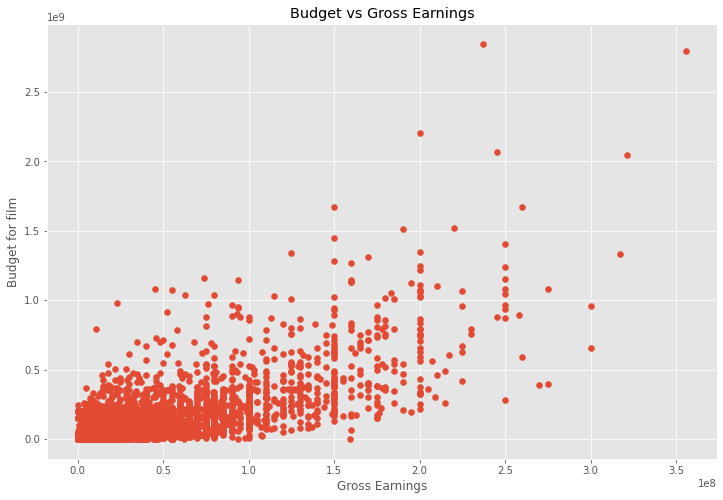

In [48]:
# project objective is to check to see what has a high correlation to the gross earnings

# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')



<AxesSubplot:xlabel='budget', ylabel='gross'>

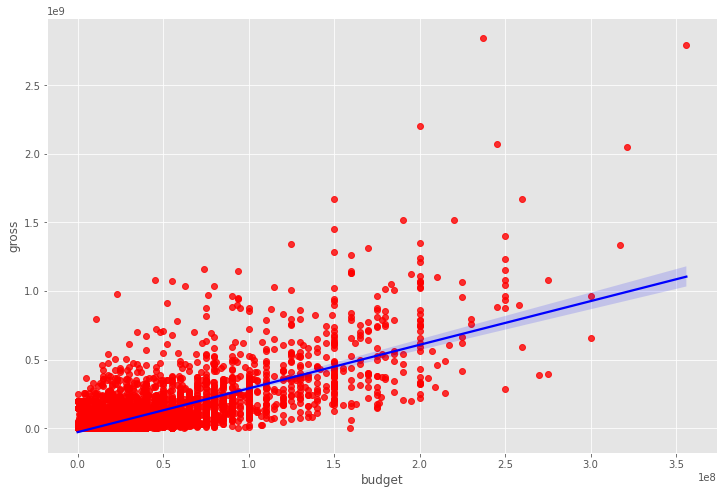

In [52]:
# regression plot - budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

# at a glance of this plot we can see that theres a positive correlation between budget & gross 

<AxesSubplot:xlabel='votes', ylabel='gross'>

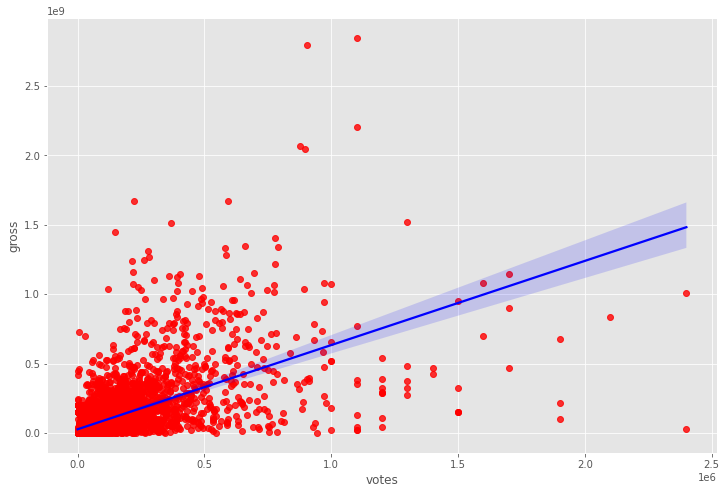

In [61]:
# regression plot for vs vs gross

sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

# we can see a postive correction between votes & gross earinings

In [54]:
# looking at correlation

df.corr(method='pearson') # different types of correlation to use are pearson (default), kendall, spearman

# highest correlations to gross earnings are 0.7 for budget, 0.71 for votes

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.225481,0.251520,0.235139,0.120811
score,0.097995,1.000000,0.409182,0.049593,0.176294,0.399451
votes,0.225481,0.409182,1.000000,0.410703,0.610867,0.305302
budget,0.251520,0.049593,0.410703,1.000000,0.699100,0.257947
gross,0.235139,0.176294,0.610867,0.699100,1.000000,0.234223
runtime,0.120811,0.399451,0.305302,0.257947,0.234223,1.000000


Text(87.0, 0.5, 'Movie Features')

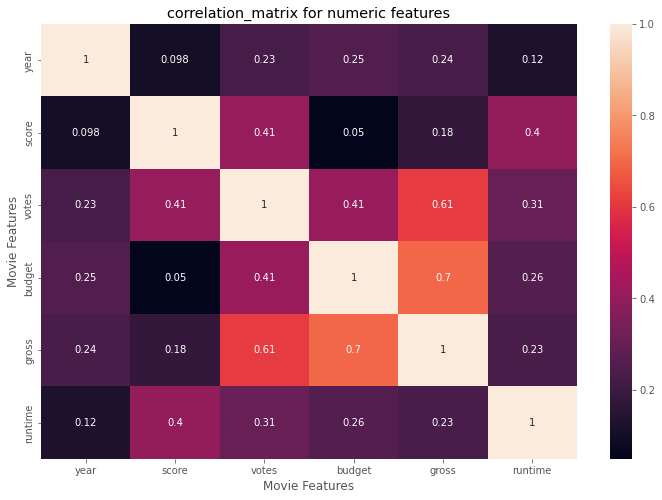

In [57]:
# heatmap visualization of correlation to make it easier to see

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('correlation_matrix for numeric features')

plt.xlabel('Movie Features')

plt.ylabel ('Movie Features')